In [4]:
import joblib
import pandas as pd
import numpy as np

# Modell laden
model = joblib.load('best_house_model.pkl')

# Test mit neuen Daten (California Housing Format mit allen Features)
# Beispiel: Haus in San Francisco Bay Area
test_data = pd.DataFrame({
    'longitude': [-122.4],
    'latitude': [37.8],
    'housing_median_age': [25.0],
    'total_rooms': [2500.0],
    'total_bedrooms': [500.0],
    'population': [800.0],
    'households': [400.0],
    'median_income': [8.0],
    'ocean_proximity': ['NEAR BAY']
})

# Feature Engineering (gleiche Features wie im Training)
test_data['rooms_per_household'] = test_data['total_rooms'] / test_data['households']
test_data['bedrooms_per_room'] = test_data['total_bedrooms'] / test_data['total_rooms']
test_data['population_per_household'] = test_data['population'] / test_data['households']
test_data['median_income_squared'] = test_data['median_income'] ** 2
test_data['median_income_cubed'] = test_data['median_income'] ** 3
test_data['income_per_room'] = test_data['median_income'] / (test_data['total_rooms'] + 1)
test_data['income_per_person'] = test_data['median_income'] / (test_data['population'] + 1)
test_data['lat_long'] = test_data['latitude'] * test_data['longitude']
test_data['income_times_age'] = test_data['median_income'] * test_data['housing_median_age']
test_data['log_total_rooms'] = np.log1p(test_data['total_rooms'])
test_data['log_population'] = np.log1p(test_data['population'])
test_data['log_median_income'] = np.log1p(test_data['median_income'])
test_data['lat_bin'] = 5  # Platzhalter für Binning
test_data['long_bin'] = 5  # Platzhalter für Binning
sf_lat, sf_long = 37.77, -122.41
test_data['distance_to_sf'] = np.sqrt((test_data['latitude'] - sf_lat)**2 + (test_data['longitude'] - sf_long)**2)
test_data['geo_cluster'] = 0  # Platzhalter für Cluster

# Vorhersage
prediction = model.predict(test_data)
print(f"Vorhergesagter Preis: ${prediction[0]:,.2f}")

print("\n=== TESTE VERSCHIEDENE HÄUSER ===")
examples = [
    {'longitude': -122.4, 'latitude': 37.8, 'housing_median_age': 25, 'total_rooms': 2500, 'total_bedrooms': 500, 'population': 800, 'households': 400, 'median_income': 8.0, 'ocean_proximity': 'NEAR BAY', 'desc': 'Luxus SF Bay'},
    {'longitude': -121.9, 'latitude': 37.3, 'housing_median_age': 15, 'total_rooms': 1500, 'total_bedrooms': 300, 'population': 500, 'households': 200, 'median_income': 6.0, 'ocean_proximity': 'INLAND', 'desc': 'Mittelklasse Inland'},
    {'longitude': -118.3, 'latitude': 34.0, 'housing_median_age': 35, 'total_rooms': 3000, 'total_bedrooms': 600, 'population': 1000, 'households': 500, 'median_income': 4.0, 'ocean_proximity': 'NEAR OCEAN', 'desc': 'Älter LA Nähe Ozean'},
    {'longitude': -119.5, 'latitude': 36.5, 'housing_median_age': 10, 'total_rooms': 1200, 'total_bedrooms': 250, 'population': 400, 'households': 150, 'median_income': 3.5, 'ocean_proximity': 'INLAND', 'desc': 'Günstiges Inland'},
]

for ex in examples:
    desc = ex.pop('desc')
    df = pd.DataFrame([ex])
    
    # Feature Engineering
    df['rooms_per_household'] = df['total_rooms'] / df['households']
    df['bedrooms_per_room'] = df['total_bedrooms'] / df['total_rooms']
    df['population_per_household'] = df['population'] / df['households']
    df['median_income_squared'] = df['median_income'] ** 2
    df['median_income_cubed'] = df['median_income'] ** 3
    df['income_per_room'] = df['median_income'] / (df['total_rooms'] + 1)
    df['income_per_person'] = df['median_income'] / (df['population'] + 1)
    df['lat_long'] = df['latitude'] * df['longitude']
    df['income_times_age'] = df['median_income'] * df['housing_median_age']
    df['log_total_rooms'] = np.log1p(df['total_rooms'])
    df['log_population'] = np.log1p(df['population'])
    df['log_median_income'] = np.log1p(df['median_income'])
    df['lat_bin'] = 5
    df['long_bin'] = 5
    df['distance_to_sf'] = np.sqrt((df['latitude'] - sf_lat)**2 + (df['longitude'] - sf_long)**2)
    df['geo_cluster'] = 0
    
    pred = model.predict(df)
    print(f"{desc:25s}: ${pred[0]:>12,.2f}")

Vorhergesagter Preis: $459,908.08

=== TESTE VERSCHIEDENE HÄUSER ===
Luxus SF Bay             : $  459,908.08
Mittelklasse Inland      : $  223,025.78
Älter LA Nähe Ozean      : $  355,923.78
Günstiges Inland         : $  112,381.21


=== MODEL PERFORMANCE METRIKEN ===

RMSE (Root Mean Squared Error):  $47,709.13
  → Durchschnittliche Abweichung in $

MAE (Mean Absolute Error):        $30,079.70
  → Durchschnittlicher absoluter Fehler

R² Score:                         0.8263
  → Erklärte Varianz (1.0 = perfekt, 0.0 = schlecht)

MAPE (Mean Absolute % Error):     15.79%
  → Durchschnittlicher prozentualer Fehler



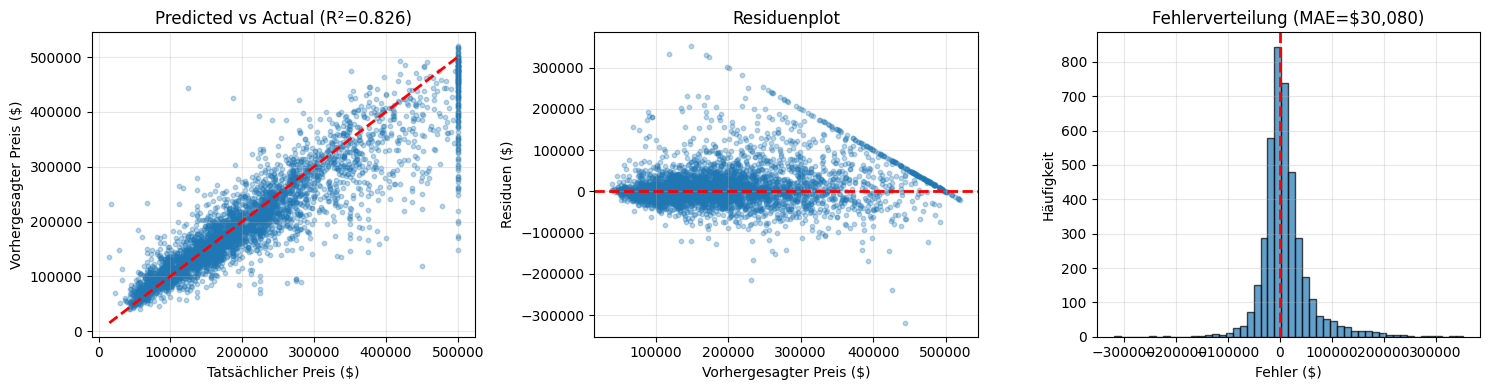


=== TOP 5 GRÖSSTE FEHLER ===
    Tatsächlich |    Vorhergesagt |          Fehler
----------------------------------------------------
$       500,001 | $       148,044 | $       351,957
$       450,000 | $       117,896 | $       332,104
$       500,001 | $       169,745 | $       330,256
$       500,001 | $       173,311 | $       326,690
$       125,000 | $       443,915 | $       318,915


In [5]:
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt

# Lade Original-Daten
housing = pd.read_csv("housing.csv")

# Feature Engineering (wie im Training)
housing['rooms_per_household'] = housing['total_rooms'] / housing['households']
housing['bedrooms_per_room'] = housing['total_bedrooms'] / housing['total_rooms']
housing['population_per_household'] = housing['population'] / housing['households']
housing['median_income_squared'] = housing['median_income'] ** 2
housing['median_income_cubed'] = housing['median_income'] ** 3
housing['income_per_room'] = housing['median_income'] / (housing['total_rooms'] + 1)
housing['income_per_person'] = housing['median_income'] / (housing['population'] + 1)
housing['lat_long'] = housing['latitude'] * housing['longitude']
housing['income_times_age'] = housing['median_income'] * housing['housing_median_age']
housing['log_total_rooms'] = np.log1p(housing['total_rooms'])
housing['log_population'] = np.log1p(housing['population'])
housing['log_median_income'] = np.log1p(housing['median_income'])
housing['lat_bin'] = pd.cut(housing['latitude'], bins=10, labels=False)
housing['long_bin'] = pd.cut(housing['longitude'], bins=10, labels=False)
sf_lat, sf_long = 37.77, -122.41
housing['distance_to_sf'] = np.sqrt((housing['latitude'] - sf_lat)**2 + (housing['longitude'] - sf_long)**2)
housing['geo_cluster'] = 0
housing.replace([np.inf, -np.inf], np.nan, inplace=True)

# Train/Test Split (gleicher random_state wie im Training)
from sklearn.model_selection import train_test_split
X = housing.drop("median_house_value", axis=1)
y = housing["median_house_value"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Vorhersagen auf Test-Set
y_pred = model.predict(X_test)

# Metriken berechnen
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100

print("=== MODEL PERFORMANCE METRIKEN ===\n")
print(f"RMSE (Root Mean Squared Error):  ${rmse:,.2f}")
print(f"  → Durchschnittliche Abweichung in $\n")

print(f"MAE (Mean Absolute Error):        ${mae:,.2f}")
print(f"  → Durchschnittlicher absoluter Fehler\n")

print(f"R² Score:                         {r2:.4f}")
print(f"  → Erklärte Varianz (1.0 = perfekt, 0.0 = schlecht)\n")

print(f"MAPE (Mean Absolute % Error):     {mape:.2f}%")
print(f"  → Durchschnittlicher prozentualer Fehler\n")

# Visualisierung
fig, axes = plt.subplots(1, 3, figsize=(15, 4))

# 1. Predicted vs Actual
axes[0].scatter(y_test, y_pred, alpha=0.3, s=10)
axes[0].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
axes[0].set_xlabel('Tatsächlicher Preis ($)')
axes[0].set_ylabel('Vorhergesagter Preis ($)')
axes[0].set_title(f'Predicted vs Actual (R²={r2:.3f})')
axes[0].grid(True, alpha=0.3)

# 2. Residuen
residuals = y_test - y_pred
axes[1].scatter(y_pred, residuals, alpha=0.3, s=10)
axes[1].axhline(y=0, color='r', linestyle='--', lw=2)
axes[1].set_xlabel('Vorhergesagter Preis ($)')
axes[1].set_ylabel('Residuen ($)')
axes[1].set_title('Residuenplot')
axes[1].grid(True, alpha=0.3)

# 3. Fehlerverteilung
axes[2].hist(residuals, bins=50, edgecolor='black', alpha=0.7)
axes[2].axvline(x=0, color='r', linestyle='--', lw=2)
axes[2].set_xlabel('Fehler ($)')
axes[2].set_ylabel('Häufigkeit')
axes[2].set_title(f'Fehlerverteilung (MAE=${mae:,.0f})')
axes[2].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Analyse der größten Fehler
errors_df = pd.DataFrame({
    'actual': y_test.values,
    'predicted': y_pred,
    'error': np.abs(y_test.values - y_pred)
})
errors_df = errors_df.sort_values('error', ascending=False)

print("\n=== TOP 5 GRÖSSTE FEHLER ===")
print(f"{'Tatsächlich':>15s} | {'Vorhergesagt':>15s} | {'Fehler':>15s}")
print("-" * 52)
for i, row in errors_df.head().iterrows():
    print(f"${row['actual']:>14,.0f} | ${row['predicted']:>14,.0f} | ${row['error']:>14,.0f}")